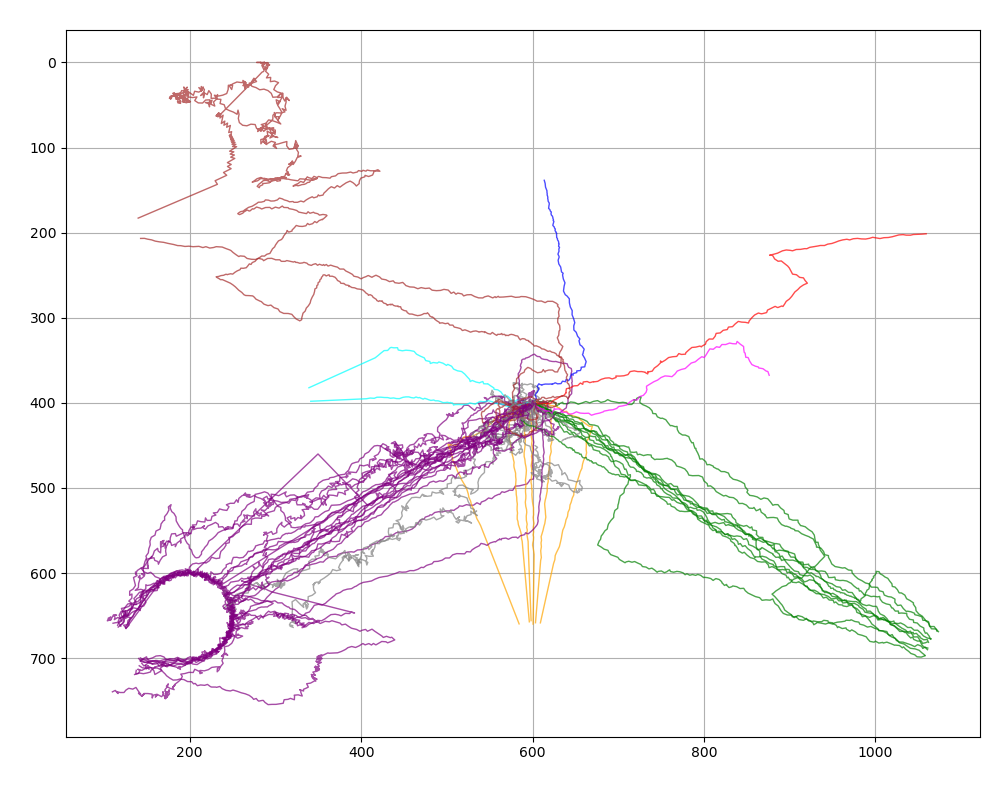

In [9]:
import json
import matplotlib.pyplot as plt
import os

# File path to the data log (change as needed)
file_path = r"D:\CODE\cursor\End-Effector-Test-Environment\user study data\data_log_20250219_145853.json"
if not os.path.exists(file_path):
    print(f"File not found: {file_path}")
    exit()

# Load the data log from the JSON file
with open(file_path, "r") as f:
    data_log = json.load(f)

# Define colors for each goal (using the coordinates from your targets)
goal_colors = {
    (600, 100): "blue",
    (1100, 200): "red",
    (1100, 700): "green",
    (600, 700): "orange",
    (100, 700): "purple",
    (100, 200): "brown",
    (900, 400): "magenta",
    (300, 400): "cyan"
}

plt.figure(figsize=(10, 8))
used_labels = set()

# Iterate through each trial in the data log and plot its trajectory.
for trial in data_log:
    trajectory = trial.get("trajectory", [])
    if not trajectory:
        continue
    xs = [pt[0] for pt in trajectory]
    ys = [pt[1] for pt in trajectory]
    
    # Determine color and label based on trial outcome.
    if trial.get("trial_outcome") == "success" and trial.get("goal_reached") is not None:
        # JSON saves tuples as lists; convert to tuple for dictionary lookup.
        goal = tuple(trial["goal_reached"])
        line_color = goal_colors.get(goal, "black")
        label = f"Goal {goal}"
    else:
        line_color = "grey"
        label = "Failure/Reset"
    
    # Add label only once to the legend.
    if label in used_labels:
        label = None
    else:
        used_labels.add(label)
    
    plt.plot(xs, ys, color=line_color, linewidth=1, alpha=0.7, label=label)

plt.xlabel(" ")
plt.ylabel(" ")
plt.title(" ")

# Invert y-axis if using screen coordinates (remove if unnecessary)
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()
